In [1]:
# Import libraries
!pip install psycopg2-binary

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
from psycopg2 import Error


In [2]:
# Connection to db 
USER = "user"
PSWD = "password"
HOST = "pg.analytics.northwestern.edu"
PORT = "5432"
DB_NAME = "everything2023"

In [3]:
# Connect to postgress database
try:
    # Connect to an existing database
    connection = psycopg2.connect(user = USER,
                                  password = PSWD,
                                  host = HOST,
                                  port = PORT,
                                  database = DB_NAME)
    cursor = connection.cursor()
    cursor.execute("SELECT version();")
    record = cursor.fetchone()
    print("You are connected to - ", record, "\n")
    
except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)

You are connected to -  ('PostgreSQL 10.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-39), 64-bit',) 



In [4]:
# Read trnsact table
trnsact = pd.read_sql("SELECT * from group_14.trnsact limit 20", connection);



/Users/hujiayu/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [5]:
trnsact

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC,UNKNOWN
0,3,202,290,1100,326708721,2005-01-18,P,1,0.0,30.00,30.00,3500000,818,0
1,3,202,540,2700,326708721,2005-01-29,R,1,0.0,30.00,30.00,15200000,818,0
2,3,303,500,2100,23702074,2004-08-18,P,1,0.0,12.00,12.00,4600000,48,0
3,3,709,360,500,0,2005-08-14,P,1,0.0,30.00,30.00,6500000,818,0
4,3,802,660,400,0,2005-08-09,P,1,440.0,30.00,30.00,4700000,599,0
5,3,1202,400,2100,0,2004-11-11,P,1,0.0,30.00,30.00,8600000,999,0
6,3,1204,220,3400,0,2004-12-22,P,1,0.0,30.00,30.00,17600000,555,0
7,3,1304,160,3500,0,2004-08-07,P,1,0.0,30.00,30.00,11400000,990,0
8,3,1703,30,200,0,2005-08-09,P,1,440.0,30.00,30.00,4800000,999,0
9,3,1703,30,2400,0,2005-08-24,R,1,440.0,30.00,30.00,10100000,999,0


In [11]:
# data type
data_type = """
  SELECT column_name, data_type 
  FROM information_schema.columns
  WHERE table_name = 'trnsact'
"""
print(pd.read_sql(data_type, connection));

   column_name          data_type
0          sku            integer
1        store               text
2     register               text
3      trannum               text
4          seq               text
5     saledate               text
6        stype               text
7     quantity               text
8         drop               text
9    origprice               text
10         amt               text
11     interid               text
12         mic               text
13       drop2               text
14         sku  character varying
15       store            integer
16    register            integer
17     trannum  character varying
18     interid  character varying
19    saledate  character varying
20       stype          character
21    quantity  character varying
22    orgprice               real
23         amt               real
24         seq  character varying
25         mic  character varying
26         SKU            integer
27       STORE            integer
28    REGISTER

/Users/hujiayu/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [12]:
count = """
SELECT count(*)FROM group_14.trnsact
"""
print(pd.read_sql(count, connection));

/Users/hujiayu/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


       count
0  120916896


In [29]:
sample = """
  SELECT *
  FROM group_14.trnsact order by random() limit 5000
"""
df = pd.read_sql(sample, connection)
df

/Users/hujiayu/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC,UNKNOWN
0,5658384,2607,810,6500,0,2005-08-04,P,1,17.99,9.00,9.00,229500055,580,0
1,4154402,7807,580,600,0,2005-03-23,P,1,17.50,17.50,17.50,683900019,605,0
2,2636299,503,290,800,988709079,2005-03-23,R,1,6.00,1.50,1.50,809100025,400,0
3,2996117,6503,30,1300,0,2004-08-26,P,1,12.00,12.00,12.00,94300127,532,0
4,3206569,6903,120,2000,920508610,2005-02-07,P,1,49.00,12.25,12.25,279400041,601,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2678074,4507,90,5000,386303118,2004-11-29,P,1,24.00,9.99,9.99,143400066,149,0
4996,2188790,1407,910,2900,910207301,2005-08-15,P,1,22.00,22.00,22.00,788100056,383,0
4997,1476520,8302,301,1100,0,2005-04-21,P,1,29.00,4.33,4.33,447600022,270,0
4998,6016371,3304,410,7000,0,2005-03-05,P,1,29.00,7.25,7.25,708100076,895,0


In [31]:
# Select only the numeric columns
numeric_columns = df.select_dtypes(include=['number'])
new_df = df[numeric_columns.columns]
new_df

,SKU,STORE,REGISTER,TRANNUM,SEQ,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC
0,5658384,2607,810,6500,0,1,17.99,9.00,9.00,229500055,580
1,4154402,7807,580,600,0,1,17.50,17.50,17.50,683900019,605
2,2636299,503,290,800,988709079,1,6.00,1.50,1.50,809100025,400
3,2996117,6503,30,1300,0,1,12.00,12.00,12.00,94300127,532
4,3206569,6903,120,2000,920508610,1,49.00,12.25,12.25,279400041,601
...,...,...,...,...,...,...,...,...,...,...,...
4995,2678074,4507,90,5000,386303118,1,24.00,9.99,9.99,143400066,149
4996,2188790,1407,910,2900,910207301,1,22.00,22.00,22.00,788100056,383
4997,1476520,8302,301,1100,0,1,29.00,4.33,4.33,447600022,270
4998,6016371,3304,410,7000,0,1,29.00,7.25,7.25,708100076,895


In [32]:
#summery
new_df.describe()

,SKU,STORE,REGISTER,TRANNUM,SEQ,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC
count,5.000000e+03,5000.000000,5000.000000,5000.00000,5.000000e+03,5000.0,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,4.957048e+06,4469.109000,399.826000,3217.16220,1.843909e+08,1.0,36.162776,24.077432,24.077432,5.030748e+08,451.786200
std,2.843467e+06,2837.668542,252.416805,4754.49134,2.996958e+08,0.0,37.297843,26.669074,26.669074,2.872672e+08,279.004677
min,7.290000e+02,102.000000,1.000000,100.00000,0.000000e+00,1.0,0.000000,0.000000,0.000000,1.000630e+05,1.000000
25%,2.585389e+06,2104.000000,190.000000,1100.00000,0.000000e+00,1.0,16.000000,9.750000,9.750000,2.577751e+08,222.000000
50%,4.773488e+06,4108.000000,370.000000,2200.00000,0.000000e+00,1.0,28.000000,17.990000,17.990000,5.045501e+08,400.000000
75%,7.382655e+06,7104.000000,580.000000,4000.00000,3.184286e+08,1.0,48.000000,30.000000,30.000000,7.519251e+08,680.000000
max,9.998733e+06,9909.000000,991.000000,97100.00000,9.999057e+08,1.0,595.000000,595.000000,595.000000,9.993001e+08,996.000000


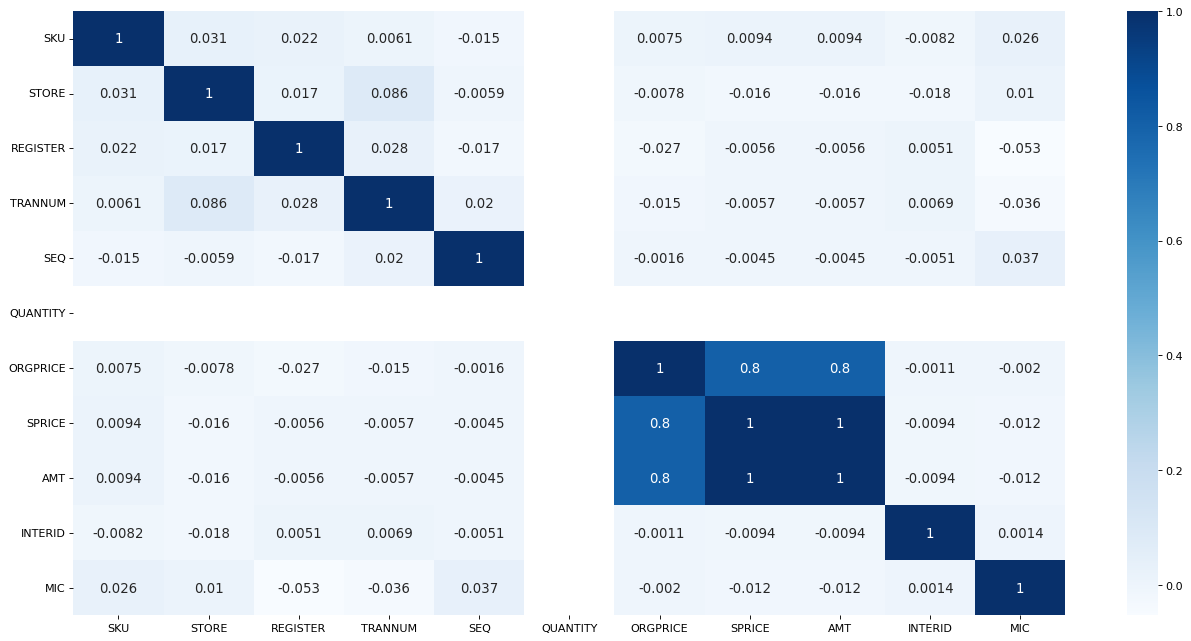

In [40]:
# Correlation matrix
plt.figure(figsize = (20, 10), dpi = 80)
sns.heatmap(new_df.corr(), 
            annot=True,
            cmap = 'Blues', 
            annot_kws={"fontsize":12})
plt.show()